# Regresión Lineal Simple
  *Gujarati, D. N. (2010). Econometría (5ª ed.). México: McGraw-Hill Interamericana.* 

La metodología de la regresión lineal simple sigue los siguientes pasos:

1. Planteamiento de la teoría o hipótesis
2. Especificación del modelo matemático de la teoría
3. Especificación del modelo econométrico o estadístico de la teoría
4. Obtención de datos
5. Estimación de los parámetros del modelo econométrico
6. Pruebas de hipótesis
7. Pronóstico
8. Uso del modelo para fines de control o de políticas

## 1. Planteamiento de la teoría o hipótesis

John Maynard Keynes, el economista, plantea en su obra:

> "La ley psicológica fundamental...consiste en que los hombres, como regla general y en promedio, están dispuestos a incrementar su consumo a medida que aumenta su ingreso, pero no en la misma cuantía del aumento en su ingreso."

En pocas palabras, Keynes sugiere que la propensión marginal a consumir (PMC) es mayor que cero pero menor que uno.

## 2. Especificación del modelo matemático de la teoría

A pesar de haber postulado una relación positiva entre el consumo y el ingreso, Keynes no especifica la forma precisa de la relación funcional entre ambos. Un economista matemático podría proponer la siguiente forma para la función de consumo keynesiana:

$$
Y = \beta_1 + \beta_2 X \quad \text{con} \quad 0 < \beta_2 < 1 
$$

donde:
- \( Y \) es el gasto de consumo,
- \( X \) es el ingreso,
- \( \beta_1 \) y \( \beta_2 \) son los parámetros del modelo, representando el intercepto y la pendiente, respectivamente.

El coeficiente de la pendiente \( \beta_2 \) mide la PMC. Esta ecuación sugiere que el consumo está linealmente relacionado con el ingreso. Este es un ejemplo de un modelo uniecuacional, ya que tiene solo una ecuación.

## 3. Especificación del modelo econométrico o estadístico de la teoría

El modelo matemático de la ecuación anterior asume una relación exacta entre consumo e ingreso. Sin embargo, en la realidad, las relaciones entre variables económicas son inexactas. Para reflejar esto, se introduce un término de error o perturbación, \( u \), en la ecuación:

$$
Y = \beta_1 + \beta_2 X + u
$$

donde \( u \) es una variable aleatoria que representa factores no considerados explícitamente en el modelo.

## 4. Obtención de datos

Para estimar los parámetros del modelo econométrico, necesitamos datos. Por ejemplo, los datos sobre el gasto de consumo personal (GCP) y el producto interno bruto (PIB) de Estados Unidos entre 1960 y 2005, medidos en miles de millones de dólares de 2000.

In [53]:
# Get data
## Consumo 
import pandas as pd
import world_bank_data as wb
pd.set_option('display.max_rows', 6)
c = wb.get_series("NE.CON.PRVT.CD", id_or_value='id', simplify_index=False)
c = c.reset_index(name = "C")


## PIB 
pib = wb.get_series("NY.GDP.MKTP.CD", id_or_value='id', simplify_index=False)
pib = pib.reset_index(name = "PIB")



### 4.1 Filtrar datos

In [58]:
cmex = c[c["Country"] == "MEX"]
pibmex = pib[pib["Country"] == "MEX"]

### 4.2 Unir datos

In [63]:
df = pd.merge(cmex, pibmex, on  = "Year")
df = df[["Year","C","PIB"]]
df.head(10)

,Year,C,PIB
0,1960,1.006864e+10,1.304000e+10
1,1961,1.088552e+10,1.416000e+10
2,1962,1.172704e+10,1.520000e+10
...,...,...,...
7,1967,1.945720e+10,2.656000e+10
8,1968,2.175656e+10,2.936000e+10
9,1969,2.370496e+10,3.248000e+10




## 5. Estimación de los parámetros del modelo econométrico

Utilizando técnicas estadísticas como el análisis de regresión, podemos estimar los valores de \( \beta_1 \) y \( \beta_2 \). Supongamos que obtenemos los siguientes valores estimados:

$$
\hat{Y} = -299.5913 + 0.7218 X
$$

donde \( \hat{Y} \) es la estimación del gasto de consumo en función del ingreso.

In [71]:
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
import numpy as np

In [79]:
# Train and test
x = df.iloc[:,-1].values
X = x[:, None] 
y = df.iloc[:,-2].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [85]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train , y_train)
y_pred = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)

In [92]:
regressor.coef_

array([0.69597231])

Text(0, 0.5, 'Propensión marginal a consumir (c)')

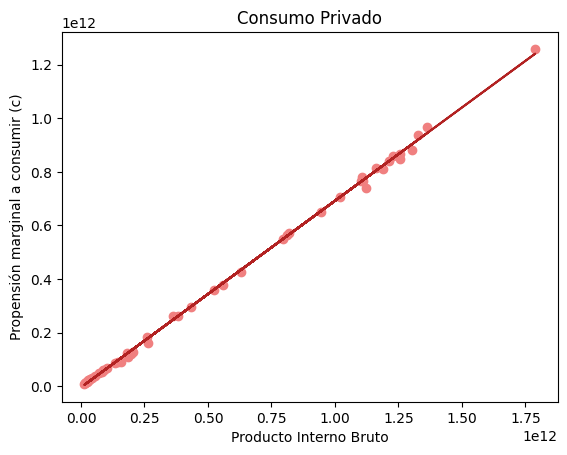

In [89]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Consumo Privado')
plt.xlabel('Producto Interno Bruto')
plt.ylabel('Propensión marginal a consumir (c)')


## 6. Pruebas de hipótesis

La estimación de \( \beta_2 \), que es aproximadamente 0.72, debe ser evaluada estadísticamente para confirmar si es significativamente diferente de 1. Si lo es, apoya la teoría de Keynes de que la PMC es menor que uno.



## 7. Pronóstico

Utilizando el modelo estimado, podemos prever valores futuros de la variable dependiente \( Y \) basados en valores conocidos o esperados de la variable explicativa \( X \). Por ejemplo, para predecir el gasto de consumo en 2006 con un PIB de 11,319.4 millones de dólares:

$$
\hat{Y}_{2006} = -299.5913 + 0.7218 \times 11,319.4 = 7,870.7516
$$



## 8. Uso del modelo para fines de control o de políticas

El modelo estimado puede servir para fines de control o políticas públicas. Por ejemplo, para mantener un nivel de gasto de 8,750 millones de dólares, podemos calcular el nivel de ingreso necesario utilizando la función de consumo estimada:

$$
8,750 = -299.5913 + 0.7218 \times \text{PIB}
$$

Resolviendo esta ecuación, encontramos el PIB necesario para alcanzar el gasto deseado.
